# Inputs and Visualizations

## Checking the data

In [64]:
import pandas as pd 
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, log_loss
from sklearn.metrics import roc_curve, roc_auc_score, auc
from xgboost import XGBClassifier




In [ ]:
url = 'https://raw.githubusercontent.com/anthonyforde/diabetes/main/diabetes_binary_5050split_health_indicators_BRFSS2015.csv'
data = pd.read_csv(url)
data.head()

In [16]:
data.describe(include='all')

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


## Check for missing data

In [61]:
data.isna().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
# pip install pandas-profiling[notebook]

In [ ]:
# !pip3 install pandas_profiling --upgrade

In [ ]:
!pip install pandas-profiling==2.7.1 

In [20]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir("/content/drive/My Drive/CA683I_DADM_Assignment")
!ls

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Diabetes_v1.ipynb  ProfileReport.html


In [19]:
from pandas_profiling import ProfileReport

profile = ProfileReport(data)
#profile.to_notebook_iframe()
profile.to_file(output_file="ProfileReport.html")

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:4812: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Histogram

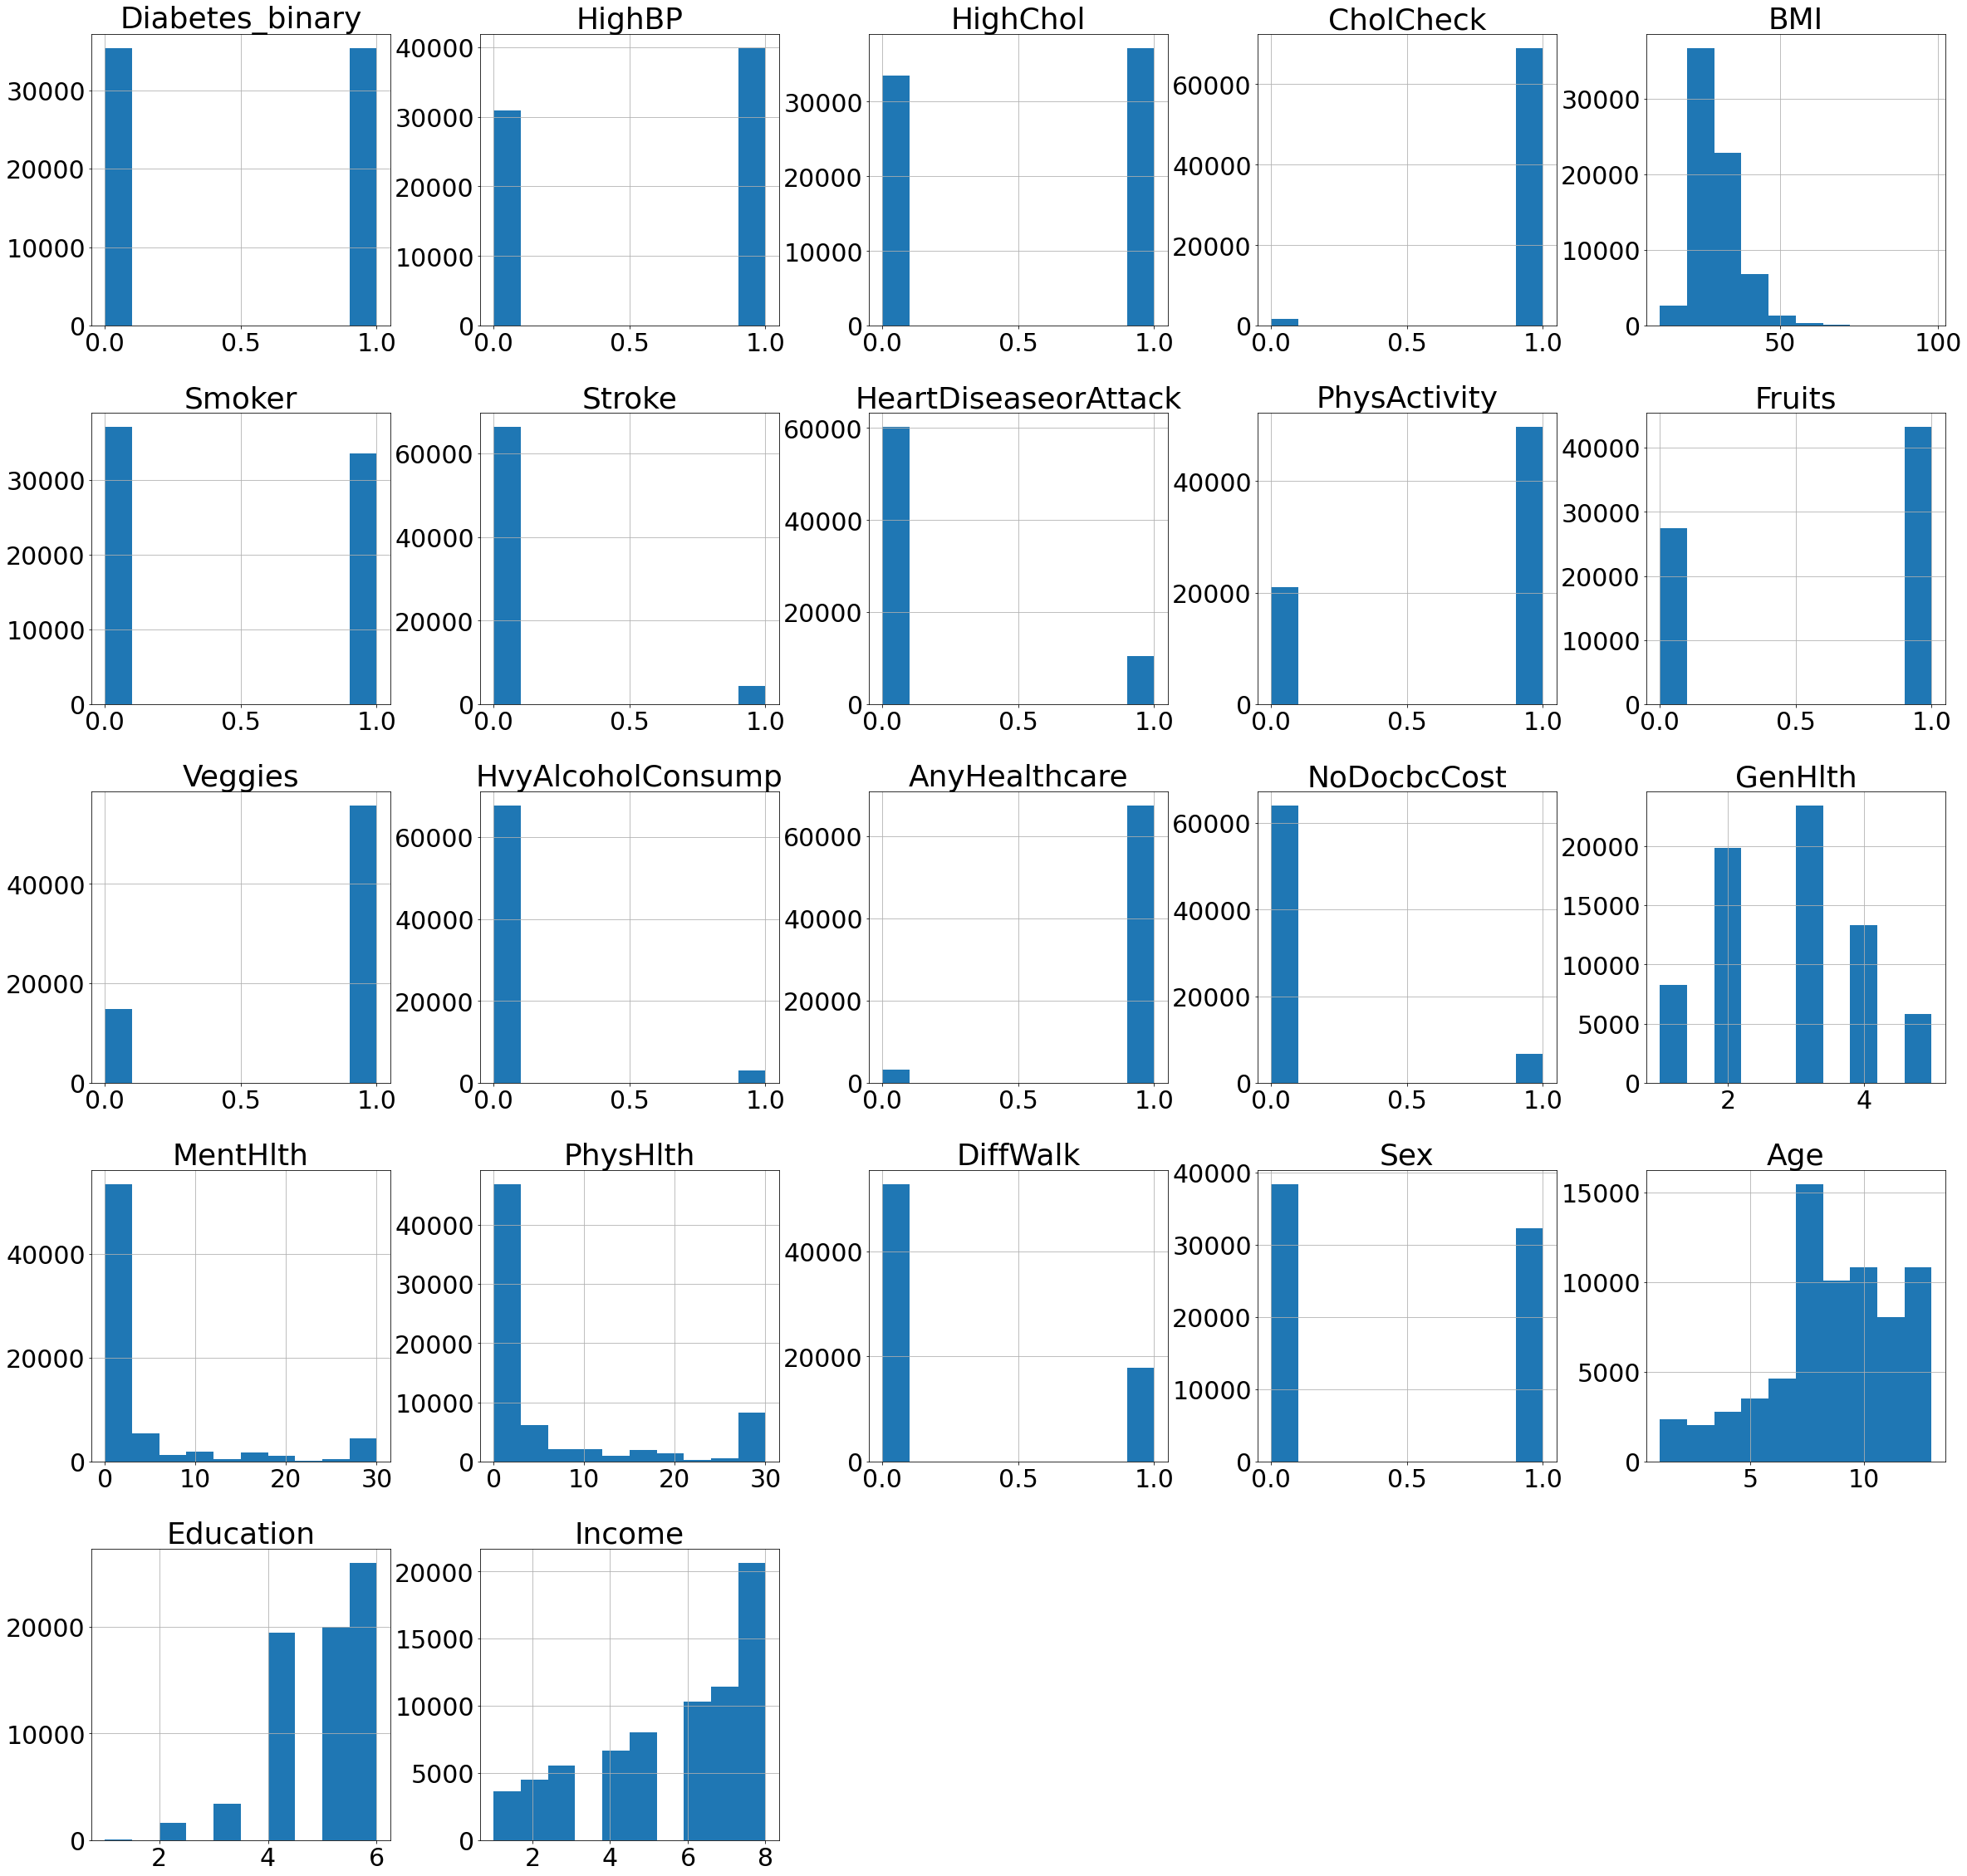

In [ ]:
plt.rc('font', size = 30)
data.hist(figsize=(40,40))
plt.savefig("pimaHist.jpg")
plt.show()

## Density Plot

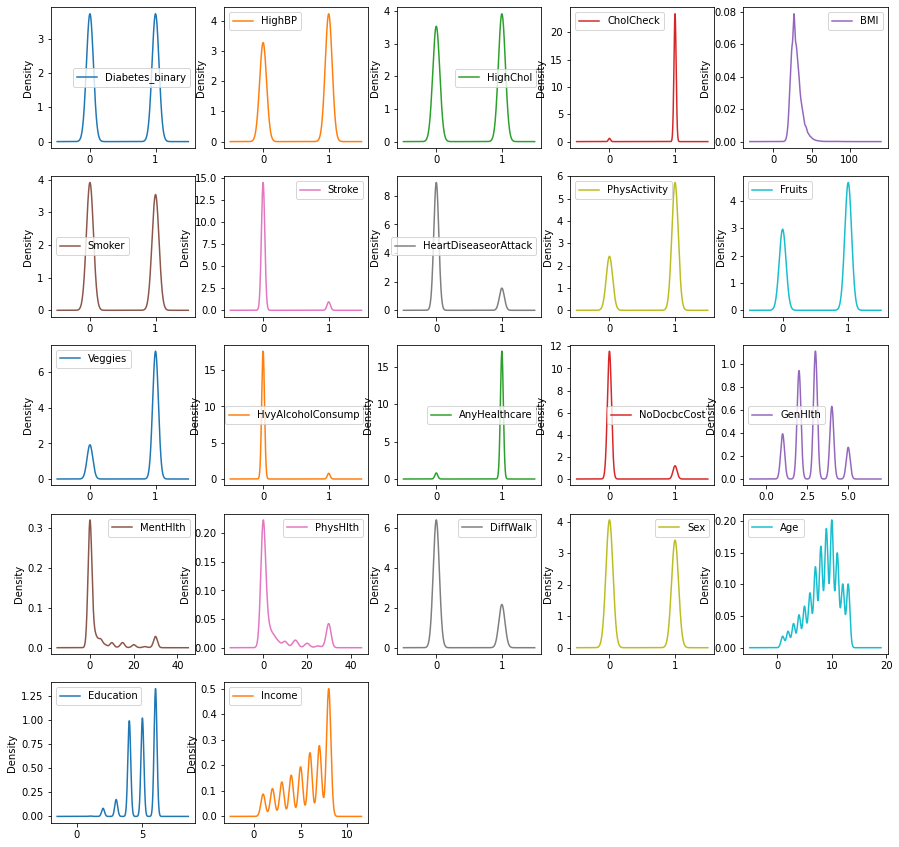

In [ ]:
from matplotlib.pyplot import figure
plt.rcParams["figure.figsize"] = (15,15)
# Reset to default size:
# plt.rcParams["figure.figsize"] = plt.rcParamsDefault["figure.figsize"]
plt.rc('font', size = 10)
data.plot(kind='density', subplots=True, layout=(5,5), sharex=False)
plt.show()

In [ ]:
skew = data.skew()
print(skew)

Diabetes_binary         0.000000
HighBP                 -0.255908
HighChol               -0.102950
CholCheck              -6.119271
BMI                     1.719180
Smoker                  0.099031
Stroke                  3.626499
HeartDiseaseorAttack    1.984703
PhysActivity           -0.888732
Fruits                 -0.458804
Veggies                -1.414969
HvyAlcoholConsump       4.522548
AnyHealthcare          -4.387510
NoDocbcCost             2.784235
GenHlth                 0.171991
MentHlth                2.388110
PhysHlth                1.657304
DiffWalk                1.138002
Sex                     0.172657
Age                    -0.545923
Education              -0.681621
Income                 -0.645073
dtype: float64


## Correlations

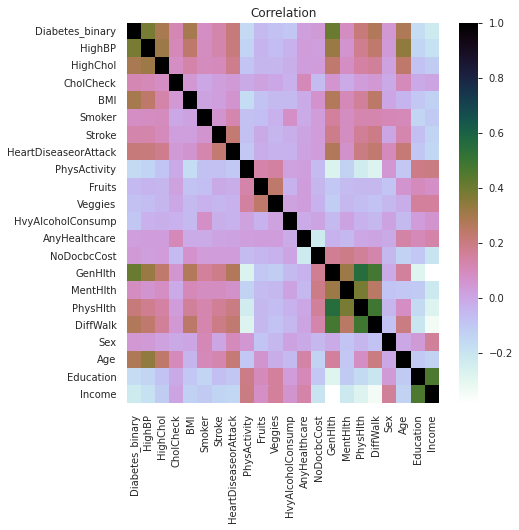

In [57]:
plt.figure(figsize=(7,7)) 
sns.heatmap(data.corr(),annot=False,cmap='cubehelix_r')
plt.title('Correlation')
plt.show()

In [60]:
data.corr()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


In [ ]:
data.corr().to_csv("Correlations.csv")

## Check for multicollinearity

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = data[['HighBP',	'HighChol',	'CholCheck',	'BMI', 'Smoker',	'Stroke',	'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0                 HighBP   3.034079
1               HighChol   2.479329
2              CholCheck  28.899936
3                    BMI  17.752276
4                 Smoker   2.032476
5                 Stroke   1.164938
6   HeartDiseaseorAttack   1.393475
7           PhysActivity   3.726380
8                 Fruits   2.811279
9                Veggies   4.993737
10     HvyAlcoholConsump   1.060520
11         AnyHealthcare  20.097987
12           NoDocbcCost   1.213267
13               GenHlth  12.946536
14              MentHlth   1.522342
15              PhysHlth   2.252134
16              DiffWalk   2.068375
17                   Sex   1.927069
18                   Age  12.274687


## Drop the highest VIF features: CholCheck, AnyHealthCare, BMI, GenHlth

In [50]:
data_final = data.drop(['CholCheck', 'AnyHealthcare', 'BMI', 'GenHlth'], axis=1)
data_final

,Diabetes_binary,HighBP,HighChol,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,NoDocbcCost,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [53]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
  
# the independent variables set
X = data_final[['HighBP',	'HighChol',	'Smoker',	'Stroke',	'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'NoDocbcCost', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']]


# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature       VIF
0                 HighBP  2.894957
1               HighChol  2.442313
2                 Smoker  2.005551
3                 Stroke  1.160441
4   HeartDiseaseorAttack  1.367391
5           PhysActivity  3.309261
6                 Fruits  2.764613
7                Veggies  4.427879
8      HvyAlcoholConsump  1.057321
9            NoDocbcCost  1.158610
10              MentHlth  1.464480
11              PhysHlth  1.984544
12              DiffWalk  1.973144
13                   Sex  1.841664
14                   Age  7.765916


## Split the dataset

In [62]:
X = data_final.drop(['Diabetes_binary'], axis=1)
y = data_final['Diabetes_binary']

In [65]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [67]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)
x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

print('Standardized features \n')
print("Feature\n\n" +str(x_train_std[:2]))

Standardized features 

Feature

[[ 0.88194426  0.94957611  1.0490982  -0.25691639  2.40021518  0.65165632
   0.79495308  0.51873002 -0.21052021 -0.32166723 -0.45879504 -0.5755321
  -0.58061717 -0.91735446  0.14711266  1.05174924  1.05666089]
 [ 0.88194426 -1.05310147 -0.95319961 -0.25691639 -0.41662931  0.65165632
  -1.25793588  0.51873002 -0.21052021 -0.32166723 -0.45879504 -0.37586631
  -0.58061717 -0.91735446 -0.20380192  1.05174924 -0.32257646]]


In [71]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

In [72]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.6909975669099757